In [2]:
!pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 163.4 kB/s eta 0:00:18
      --------------------------------------- 0.0/3.0 MB 163.4 kB/s eta 0:00:18
     - -------------------------------------- 0.1/3.0 MB 241.3 kB/s eta 0:00:12
     - -------------------------------------- 0.1/3.0 MB 241.3 kB/s eta 0:00:12
     - -------------------------------------- 0.1/3.0 MB 209.5 kB/s eta 0:00:14
     - -------------------------------------- 0.1/3.0 MB 209.5 kB/s eta 0:00:14
     - ----------------

## Importing Library 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## Importing Data

### We have considered the stock market data of last 10 years 

In [4]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.554291,147611217
1,1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.625692,114989399
2,2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.395069,131808205
3,3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.171415,108119746
4,4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.485767,233776981
...,...,...,...,...,...,...,...,...
2756,2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.201660,26452900
2757,2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.096336,28298800
2758,2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.756721,48485500
2759,2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.048668,23020500


## Data Exploration and Analysis 

## Data Preprocessing 

### Moving Average of last 100 days 

In [8]:
ma_100_days = data.Close.rolling(100).mean()

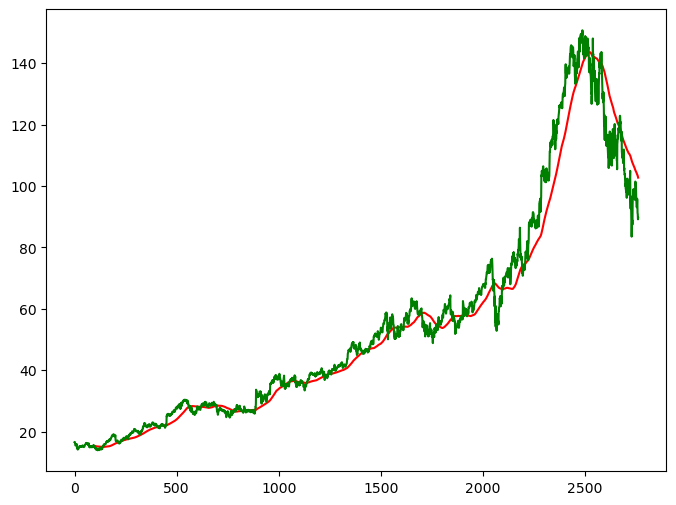

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

### Moving Average of last 100 days

In [10]:
ma_200_days = data.Close.rolling(200).mean()

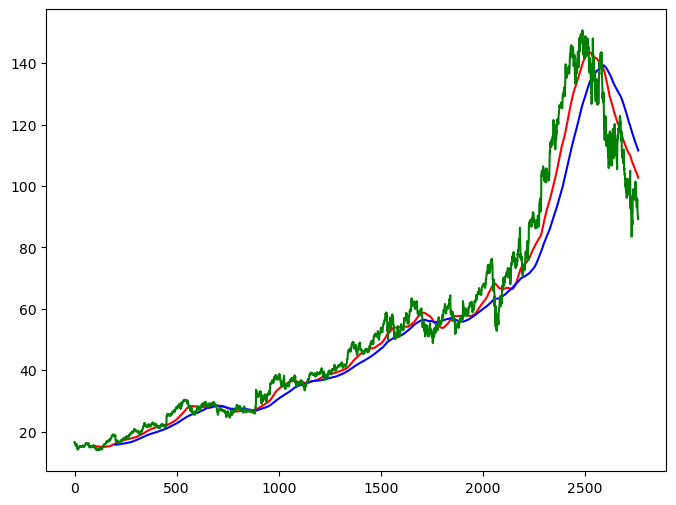

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

## Handling Missing Values - Data Cleaning 

In [12]:
data.dropna(inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      2761 non-null   int64         
 1   Date       2761 non-null   datetime64[ns]
 2   Open       2761 non-null   float64       
 3   High       2761 non-null   float64       
 4   Low        2761 non-null   float64       
 5   Close      2761 non-null   float64       
 6   Adj Close  2761 non-null   float64       
 7   Volume     2761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 172.7 KB


### Train-test Split 

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2208

In [15]:
data_test.shape[0]

553

### Data Normalization

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_scale = scaler.fit_transform(data_train)

In [18]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

## Model Creation 

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

E:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - loss: 0.0591
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0065
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - loss: 0.0052
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0052
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0052
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - loss: 0.0039
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0039
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0039
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0041
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0033
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0035
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0030
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - loss: 0.0030
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

## Prediction of the values using Model

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [40]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [41]:
y_predict

array([[ 7.86557239],
       [ 7.89654968],
       [ 7.99675105],
       [ 8.17064565],
       [ 8.41323805],
       [ 8.71489473],
       [ 9.05475012],
       [ 9.41118803],
       [ 9.77236874],
       [10.13656423],
       [10.51071489],
       [10.89174064],
       [11.27372776],
       [11.63402228],
       [11.95464397],
       [12.23527114],
       [12.48550402],
       [12.72326364],
       [12.99035758],
       [13.32834199],
       [13.76167651],
       [14.29448889],
       [14.90587658],
       [15.56644734],
       [16.24404063],
       [16.91306658],
       [17.55353839],
       [18.16147376],
       [18.73058059],
       [19.24887987],
       [19.69991235],
       [20.06473273],
       [20.34071325],
       [20.54288714],
       [20.69618856],
       [20.81644449],
       [20.92718526],
       [21.0604469 ],
       [21.24966562],
       [21.51991362],
       [21.86681541],
       [22.26995529],
       [22.70411068],
       [23.1255537 ],
       [23.49369699],
       [23

In [44]:
scale  = 1/scaler.scale_

In [45]:
y_predict = y_predict*scale

In [46]:
y = y*scale

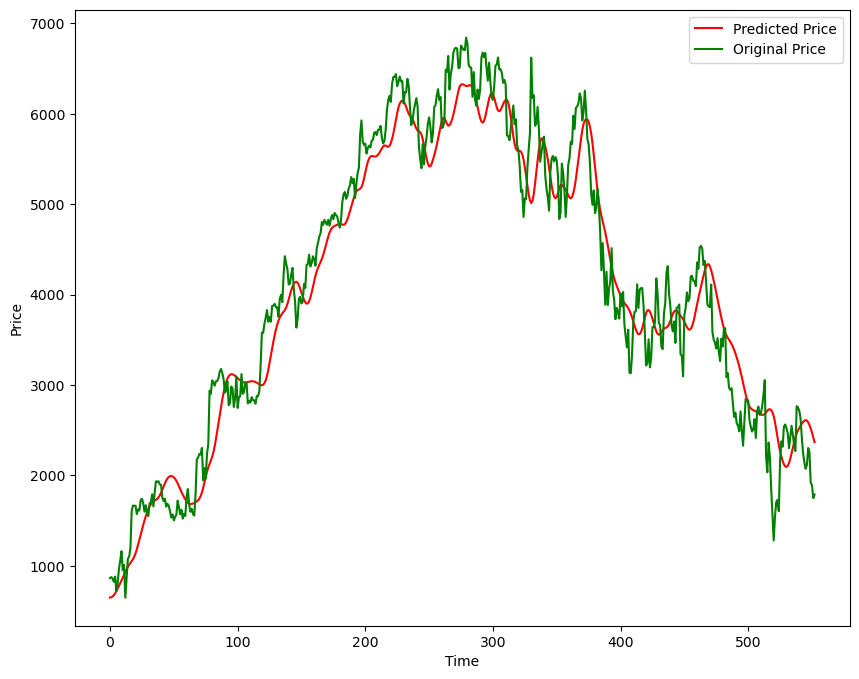

In [49]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')